In [2]:
import sys

!jupyter nbextension enable --py widgetsnbextension
!pip install matplotlib
!pip install graphviz

Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
Paths used for configuration of notebook: 
    	
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import cross_val_score
import pandas as pd

# Load the dataset
file_path = '/content/Cleaned_2.csv'
df = pd.read_csv(file_path)
df=df.drop(columns=['pot'])






In [3]:
# Let's display first 10 records
df.head(10)


,bp (Diastolic),bp limit,sg,al,class,rbc,su,pc,pcc,ba,...,htn,dm,cad,appet,pe,ane,grf,stage,affected,age
0,Low,Normal,1.019,1.0,Yes,Normal,No Trace,Normal,Not present,Not present,...,No,No,No,Good,No,No,227.9440,Stage 1,Both,12.0
1,Low,Normal,1.009,0.0,Yes,Normal,No Trace,Normal,Not present,Not present,...,No,No,No,Good,No,No,227.9440,Stage 1,Both,12.0
2,Low,Normal,1.009,4.0,Yes,Abnormal,No Trace,Abnormal,Not present,Present,...,No,No,No,Poor,No,No,127.2810,Stage 1,Both,12.0
3,Normal,Stage 1 Hypertension,1.009,3.0,Yes,Normal,No Trace,Normal,Not present,Not present,...,No,No,No,Good,No,No,127.2810,Stage 1,Both,12.0
4,Low,Normal,1.015,0.0,Yes,Normal,No Trace,Normal,Not present,Not present,...,No,Yes,No,Poor,Yes,No,127.2810,Stage 1,Both,12.0
5,Normal,Stage 1 Hypertension,1.023,0.0,No,Normal,No Trace,Normal,Not present,Not present,...,No,No,No,Good,No,No,102.1150,Stage 1,Left or Right,12.0
6,Low,Normal,1.019,3.0,Yes,Normal,No Trace,Normal,Not present,Not present,...,Yes,Yes,No,Good,No,No,177.6120,Stage 1,Both,12.0
7,Low,Normal,1.019,0.0,Yes,Normal,No Trace,Normal,Not present,Not present,...,No,No,No,Good,No,No,26.6175,Stage 4,Both,12.0
8,Low,Normal,1.023,0.0,No,Normal,No Trace,Normal,Not present,Not present,...,No,No,No,Good,No,No,26.6175,Stage 4,Left or Right,20.0
9,Normal,Stage 2 Hypertension,1.009,4.0,Yes,Normal,No Trace,Abnormal,Present,Present,...,No,No,No,Good,No,Yes,51.7832,Stage 3,Both,20.0


In [4]:
# look at meta information about data, such as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bp (Diastolic)  200 non-null    object 
 1   bp limit        200 non-null    object 
 2   sg              200 non-null    float64
 3   al              200 non-null    float64
 4   class           200 non-null    object 
 5   rbc             200 non-null    object 
 6   su              200 non-null    object 
 7   pc              200 non-null    object 
 8   pcc             200 non-null    object 
 9   ba              200 non-null    object 
 10  bgr             200 non-null    float64
 11  bu              200 non-null    object 
 12  sod             200 non-null    float64
 13  sc              200 non-null    object 
 14  hemo            200 non-null    float64
 15  pcv             200 non-null    float64
 16  rbcc            200 non-null    float64
 17  wbcc            200 non-null    flo

In [5]:
# Let's see meta information about numeric data, we can also see if there any extreme values
df.describe()

,sg,al,bgr,sod,hemo,pcv,rbcc,wbcc,grf,age
count,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,1.016670,0.980000,144.130000,134.950000,11.61850,36.015500,4.445250,7621.800000,61.975415,49.630000
std,0.005052,1.329828,70.704162,6.276502,2.74459,7.944639,0.841562,2759.797669,50.464011,15.935583
min,1.007000,0.000000,112.000000,118.000000,6.10000,17.900000,2.690000,4980.000000,26.617500,12.000000
25%,1.015000,0.000000,112.000000,133.000000,10.00000,29.600000,3.870000,4980.000000,26.617500,43.000000
50%,1.019000,0.000000,112.000000,133.000000,11.30000,37.400000,4.460000,7360.000000,26.617500,51.000000
75%,1.019000,2.000000,154.000000,138.000000,13.90000,41.300000,5.050000,7360.000000,76.949000,59.000000
max,1.023000,4.000000,448.000000,158.000000,16.50000,49.100000,7.410000,24020.000000,227.944000,74.000000


# First section only works if data already has numeric encoding, and second section converts any categorical values (e.g., string values) to numeric encoding.

**Let's develop a decison tree in Python**

In [6]:
# First split the data into train and test set
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features
class_col_name='class'

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1)

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column in X_train
for column in X_train.columns:
    # Check if the column contains string values
    if X_train[column].dtype == 'object':
        # Fit the encoder to the unique values in the column
        # Get unique values from both train and test sets
        all_unique_values = pd.unique(pd.concat([X_train[column], X_test[column]]))
        encoder.fit(all_unique_values)

        # Transform the column values to numerical labels
        X_train[column] = encoder.transform(X_train[column])
        # Transform the corresponding column in X_test using the same encoder
        X_test[column] = encoder.transform(X_test[column])

# Impute missing values using pandas fillna with the mean for numeric features
# This will replace NaN values with the mean of the respective column
# You can also consider other strategies like median, mode or a constant value.
for column in X_train.select_dtypes(include=['number']).columns: # Impute only numeric features
    X_train[column] = X_train[column].fillna(X_train[column].mean()) # Fill NaN with mean for X_train
    X_test[column] = X_test[column].fillna(X_test[column].mean())   # Fill NaN with mean for X_test

# Impute missing values in y_train if it's not numeric (e.g., categorical)
# Use the most frequent value (mode) for categorical target variables
if y_train.dtype == 'object':
    y_train = y_train.fillna(y_train.mode()[0])  # Use mode for categorical target
    y_test = y_test.fillna(y_test.mode()[0])    # Use mode for categorical target

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


Let's plot the tree using the following code. Here I am just passing feature_names, tree model (clf) and class values to the grpahviz function.

class Names ['Yes', 'No']


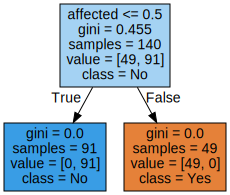

In [7]:
import graphviz
import numpy as np
#Get unique class values to display on the tree
class_values=df[class_col_name].unique()
# Remove nan values if exist
class_values = [v for v in class_values if not isinstance(v, float) or not np.isnan(v)]
print ("class Names",class_values)


dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=feature_names,
                                class_names=class_values,
                                filled=True)
# Plot tree
graph = graphviz.Source(dot_data, format="png")
graph


In [8]:
# Let's make the prdictions on the test set  that we set aside earlier using the trained tree
y_pred = clf.predict(X_test)


Time to get rid of any confusion about prediction accuracy and print our confusion matrix.

In [9]:
from sklearn.metrics import confusion_matrix
cf=confusion_matrix(y_test, y_pred)
print ("Confusion Matrix")
print(cf)
tn, fp, fn, tp=cf.ravel()
print ("TP: ", tp,", FP: ", fp,", TN: ", tn,", FN:", fn)

Confusion Matrix
[[23  0]
 [ 0 37]]
TP:  37 , FP:  0 , TN:  23 , FN: 0


In [10]:
#print precision, recall, and accuracy from the perspective of each of the class
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          No       1.00      1.00      1.00        23
         Yes       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Naive Bayes

In [11]:
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)

In [12]:
print ("Total Columns (including class)",len(df.columns))

Total Columns (including class) 28


Let's understand our Naive Bayes model

In [13]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  27
Classes  ['No' 'Yes']
Number of records for classes  [49. 91.]
Log prior probability for classes  [-1.04982212 -0.43078292]
Log conditional probability for each feature given a class
 [[ -9.6097465   -9.6097465   -8.85560221 -12.78780033  -8.87577732
   -7.79058805  -8.87577732 -12.78780033 -12.78780033  -4.17729896
   -7.67581254  -3.95901324  -7.10082497  -6.22154993  -5.11118761
   -7.2701868   -0.06752477 -12.78780033 -12.78780033 -12.78780033
  -12.78780033 -12.78780033 -12.78780033  -4.31074157  -9.5689245
   -8.87577732  -5.07580382]
 [ -9.64446988  -9.15426355  -9.00026645  -8.57344555  -9.21880207
   -7.97946212  -9.528957   -10.35823635 -11.13839491  -3.94443592
   -7.58304685  -4.13582544  -7.43373159  -6.73034617  -5.57963821
   -7.64133654  -0.05627893  -9.47584717  -9.56599827 -10.5918512
  -10.07055428 -10.24045332 -10.27819364  -5.30491959  -8.07670467
  -13.53629018  -5.0803343 ]]


Again just like decsion tree, NB here used the label encoding (categories to ordinal values) as numerical values to measure log probabilities. let's see classification report.

In [14]:
from sklearn.metrics import classification_report
from sklearn import metrics

print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          No       0.87      0.87      0.87        23
         Yes       0.92      0.92      0.92        37

    accuracy                           0.90        60
   macro avg       0.89      0.89      0.89        60
weighted avg       0.90      0.90      0.90        60



K-Nearest Neighbors (KNN) Classifier


In [15]:
from sklearn.neighbors import KNeighborsClassifier


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

Classification Report for KNN:
               precision    recall  f1-score   support

          No       0.86      0.83      0.84        23
         Yes       0.89      0.92      0.91        37

    accuracy                           0.88        60
   macro avg       0.88      0.87      0.88        60
weighted avg       0.88      0.88      0.88        60



Logistic Regression (LR) Classifier

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Initialize Logistic Regression
lr_classifier = LogisticRegression(random_state=42, max_iter=1000)

# Train the model
lr_classifier.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_classifier.predict(X_test)

# Evaluate the model
print("\nLogistic Regression Classifier Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))



Logistic Regression Classifier Accuracy: 0.9666666666666667
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          No       0.92      1.00      0.96        23
         Yes       1.00      0.95      0.97        37

    accuracy                           0.97        60
   macro avg       0.96      0.97      0.97        60
weighted avg       0.97      0.97      0.97        60



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Support Vector Machine (SVM) Classifier

In [17]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

Classification Report for SVM:
               precision    recall  f1-score   support

          No       0.00      0.00      0.00        23
         Yes       0.62      1.00      0.76        37

    accuracy                           0.62        60
   macro avg       0.31      0.50      0.38        60
weighted avg       0.38      0.62      0.47        60



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Section 2: Categorical to One-Hot (numeric) Encoding
# This section works with all datasets
Now, let's try to create on-hot-encoding of categorical variables--i.e., each value in a categorical variable will become a variable itself and its value will be 1 or 0. This way we can encode categorical data into numerical features. More here: https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/

In [21]:
#Let's create a list for our categorical columns

cat_cols=["bp (Diastolic)","bp limit","rbc"\
          ,"su","pc","pcc","ba", "bu", "sc", \
          "hemo","pcv","rbcc","wbcc",\
          "htn","dm","cad","appet","pe","ane",\
          "stage","affected","age"]


In [22]:
# Create a copy of the data frame in memory with a different name
df_onehot=df.copy()
#convert only categorical variables/features to dummy/one-hot features
df_onehot = pd.get_dummies(df, columns=cat_cols, prefix = cat_cols)
#print the dataset
df_onehot


,sg,al,class,bgr,sod,grf,bp (Diastolic)_Low,bp (Diastolic)_Normal,bp limit_Normal,bp limit_Stage 1 Hypertension,...,affected_Left or Right,age_12.0,age_20.0,age_27.0,age_35.0,age_43.0,age_51.0,age_59.0,age_66.0,age_74.0
0,1.019,1.0,Yes,112.0,138.0,227.9440,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
1,1.009,0.0,Yes,112.0,133.0,227.9440,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
2,1.009,4.0,Yes,112.0,133.0,127.2810,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
3,1.009,3.0,Yes,112.0,133.0,127.2810,False,True,False,True,...,False,True,False,False,False,False,False,False,False,False
4,1.015,0.0,Yes,154.0,133.0,127.2810,True,False,True,False,...,False,True,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.019,0.0,Yes,154.0,138.0,26.6175,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
196,1.019,0.0,Yes,112.0,133.0,26.6175,True,False,True,False,...,False,False,False,False,False,False,False,False,False,True
197,1.023,0.0,No,112.0,143.0,51.7832,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True
198,1.023,0.0,No,112.0,138.0,102.1150,False,True,False,True,...,True,False,False,False,False,False,False,False,False,True


In [23]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="class"

# Split dataset into training set and test set
# Our class column is Creditability here and everything else will be used as features
class_col_name='class'

feature_names=df.columns[df.columns != class_col_name ]
# 70% training and 30% test
X_train, X_test, y_train, y_test = train_test_split(df.loc[:, feature_names], df[class_col_name], test_size=0.3,random_state=1)

# Create a LabelEncoder object
encoder = LabelEncoder()

# Iterate over each column in X_train
for column in X_train.columns:
    # Check if the column contains string values
    if X_train[column].dtype == 'object':
        # Fit the encoder to the unique values in the column
        # Get unique values from both train and test sets
        all_unique_values = pd.unique(pd.concat([X_train[column], X_test[column]]))
        encoder.fit(all_unique_values)

        # Transform the column values to numerical labels
        X_train[column] = encoder.transform(X_train[column])
        # Transform the corresponding column in X_test using the same encoder
        X_test[column] = encoder.transform(X_test[column])

# Impute missing values using pandas fillna with the mean for numeric features
# This will replace NaN values with the mean of the respective column
# You can also consider other strategies like median, mode or a constant value.
for column in X_train.select_dtypes(include=['number']).columns: # Impute only numeric features
    X_train[column] = X_train[column].fillna(X_train[column].mean()) # Fill NaN with mean for X_train
    X_test[column] = X_test[column].fillna(X_test[column].mean())   # Fill NaN with mean for X_test

# Impute missing values in y_train if it's not numeric (e.g., categorical)
# Use the most frequent value (mode) for categorical target variables
if y_train.dtype == 'object':
    y_train = y_train.fillna(y_train.mode()[0])  # Use mode for categorical target
    y_test = y_test.fillna(y_test.mode()[0])    # Use mode for categorical target

from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train, y_train)
print("Successfuly trained the decision tree...")

Successfuly trained the decision tree...


In [37]:
# Repeat Naive Bayes modeling
from sklearn.naive_bayes import MultinomialNB

#Create a MultiNomial NB Classifier
nb = MultinomialNB()

#Train the model using the training sets
nb.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = nb.predict(X_test)
print ("Succesfully done..")

Succesfully done..


Naive Bayes output

In [25]:
print("Number of features used ",nb.n_features_in_)
print("Classes ",nb.classes_)
print("Number of records for classes ",nb.class_count_)
print("Log prior probability for classes ", nb.class_log_prior_)
print("Log conditional probability for each feature given a class\n",nb.feature_log_prob_)

Number of features used  27
Classes  ['No' 'Yes']
Number of records for classes  [49. 91.]
Log prior probability for classes  [-1.04982212 -0.43078292]
Log conditional probability for each feature given a class
 [[ -9.6097465   -9.6097465   -8.85560221 -12.78780033  -8.87577732
   -7.79058805  -8.87577732 -12.78780033 -12.78780033  -4.17729896
   -7.67581254  -3.95901324  -7.10082497  -6.22154993  -5.11118761
   -7.2701868   -0.06752477 -12.78780033 -12.78780033 -12.78780033
  -12.78780033 -12.78780033 -12.78780033  -4.31074157  -9.5689245
   -8.87577732  -5.07580382]
 [ -9.64446988  -9.15426355  -9.00026645  -8.57344555  -9.21880207
   -7.97946212  -9.528957   -10.35823635 -11.13839491  -3.94443592
   -7.58304685  -4.13582544  -7.43373159  -6.73034617  -5.57963821
   -7.64133654  -0.05627893  -9.47584717  -9.56599827 -10.5918512
  -10.07055428 -10.24045332 -10.27819364  -5.30491959  -8.07670467
  -13.53629018  -5.0803343 ]]


We have probailities of a lot more features now.

See evaluation metrics below.

In [38]:
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on both y_test and y_pred to capture all labels
# This ensures that all unique labels from both arrays are known to the encoder
label_encoder.fit(np.concatenate((y_test, y_pred)))

# Transform both y_test and y_pred to numerical labels
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Now calculate the confusion matrix using the encoded labels
cf = confusion_matrix(y_test_encoded, y_pred_encoded)
print("Confusion Matrix")
print(cf)

# Check the shape of the confusion matrix
print("Shape of confusion matrix:", cf.shape)

# If the confusion matrix is 2x2, unpack as before
if cf.shape == (2, 2):
    tn, fp, fn, tp = cf.ravel()
    print("TP: ", tp, ", FP: ", fp, ", TN: ", tn, ", FN:", fn)
# Otherwise, handle the multi-class case
else:
    # Access elements using indexing
    # Example for a 3x3 matrix
    # Assuming labels are 0, 1, 2
    # tp_0 = cf[0, 0]  # True positives for class 0
    # fp_0 = cf[0, 1] + cf[0, 2] # False positives for class 0
    # ...
    print("Multi-class confusion matrix. Handle elements using indexing.")

Confusion Matrix
[[21  2]
 [ 3 34]]
Shape of confusion matrix: (2, 2)
TP:  34 , FP:  2 , TN:  21 , FN: 3


In [39]:
# Assuming y_test and y_pred are the original arrays
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on both y_test and y_pred to capture all labels
label_encoder.fit(np.concatenate((y_test, y_pred)))

# Transform both y_test and y_pred to numerical labels
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Now use the encoded labels in the classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred_encoded))



              precision    recall  f1-score   support

           0       0.88      0.91      0.89        23
           1       0.94      0.92      0.93        37

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



Decision tree on one-hot encoded data**

class Names ['Yes' 'No']


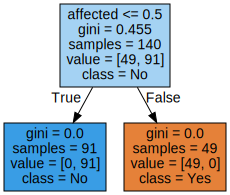

In [30]:
import numpy as np
import pandas as pd
from sklearn import tree
import graphviz

# Assuming 'df_onehot' is your DataFrame and 'class_col_name' is 'class'
# Drop rows with NaN values in the 'class' column
df_onehot = df_onehot.dropna(subset=[class_col_name])

# Recalculate unique class values after dropping NaNs
class_values = df_onehot[class_col_name].unique()
print("class Names", class_values)

# Build DecisionTreeClassifier with adjusted input data (df_onehot).
# Instead of using df_onehot.index directly, get the common indices between
# df_onehot and X_train/y_train
not_null_class_index = df_onehot.index
common_index = not_null_class_index.intersection(X_train.index)

# Use the common index to extract data from X_train and y_train:
X_train_not_null = X_train.loc[common_index]
y_train_not_null = y_train.loc[common_index]

# Train the Decision Tree on the valid values:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X_train_not_null, y_train_not_null)

# Draw graph
graph = graphviz.Source(dot_data, format="png")
graph

In [31]:
# Perform prediction on the test set
y_pred = clf.predict(X_test)

In [32]:
# Assuming y_test and y_pred are the original arrays
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit the encoder on both y_test and y_pred to capture all labels
label_encoder.fit(np.concatenate((y_test, y_pred)))

# Transform both y_test and y_pred to numerical labels
y_test_encoded = label_encoder.transform(y_test)
y_pred_encoded = label_encoder.transform(y_pred)

# Now use the encoded labels in the classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test_encoded, y_pred_encoded)) # Use encoded labels here

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



Logistic Regression One hot coded

In [40]:
#Repeat the train test set split
from sklearn.model_selection import train_test_split
class_col_name="class"

one_hot_feature_names=df_onehot.columns[df_onehot.columns != class_col_name]
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(df_onehot.loc[:, one_hot_feature_names], df_onehot[class_col_name], test_size=0.3,random_state=109) # 70% training and 30% test

In [41]:
from sklearn.linear_model import LogisticRegression


lr_classifier = LogisticRegression(random_state=42, max_iter=1000)
lr_classifier.fit(X_train, y_train)
y_pred_lr = lr_classifier.predict(X_test)

print("\nLogistic Regression Classifier Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report for Logistic Regression:\n", classification_report(y_test, y_pred_lr))


Logistic Regression Classifier Accuracy: 1.0
Classification Report for Logistic Regression:
               precision    recall  f1-score   support

          No       1.00      1.00      1.00        23
         Yes       1.00      1.00      1.00        37

    accuracy                           1.00        60
   macro avg       1.00      1.00      1.00        60
weighted avg       1.00      1.00      1.00        60



KNN One Hot Coded


In [42]:
from sklearn.neighbors import KNeighborsClassifier


knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)

print("Classification Report for KNN:\n", classification_report(y_test, y_pred_knn))

Classification Report for KNN:
               precision    recall  f1-score   support

          No       0.88      0.91      0.89        23
         Yes       0.94      0.92      0.93        37

    accuracy                           0.92        60
   macro avg       0.91      0.92      0.91        60
weighted avg       0.92      0.92      0.92        60



SVM One Hot Coded


In [43]:
from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf', random_state=42)
svm_classifier.fit(X_train, y_train)
y_pred_svm = svm_classifier.predict(X_test)

print("Classification Report for SVM:\n", classification_report(y_test, y_pred_svm))

Classification Report for SVM:
               precision    recall  f1-score   support

          No       0.85      0.74      0.79        23
         Yes       0.85      0.92      0.88        37

    accuracy                           0.85        60
   macro avg       0.85      0.83      0.84        60
weighted avg       0.85      0.85      0.85        60

